# Solid Earth-Geoinformatics

## Module 1: MORB Global Systematics 

### I. Accessing global datasets with simple coding (or Excel). 

### What am I looking at here? ###
This is a Jupyter Notebook, a document in a web browser that you can edit, generate text, and run code (typically Python). You may have previously seen or used a Jupyter Notebook for courses such as UN3400: Computational Earth Science. In this particalur case, to help the code run smoothly, we are doing the processing in the cloud using a tool called Google Colab. This means that you should be able to access all of the packages required and execute the code independent of the details of the computer that you are using locally - all you need is access to an internet connection and a web browser.


### Online Big Data - Bathymetry and MORB compositions ###
A key feature of modern earth and environmental sciences is that huge observational, experimental and thermodynamic datasets are now available. The IEDA2 data infrastructures hosts obseravtional datasets with EarthChem and experimental and thermodynamic datasets with LEPR/TraceDs (Library of Experimental Phase Relations/Trace element Distribution experimental database). Tools like Python allow for increased interaction with these datasets. In this practical we will look at two datasets - one of [mid-ocean ridge basalt compositions](https://www.earthchem.org/petdb)] and one of [global bathymetry](https://www.gmrt.org/). You can click on the links to understand the data sources. The bathymetric data has a horizontal spatial resolution of 100-500m and there are over 100,000 samples with analyses in the PetDB database.


### NumPy for simple maths, Pandas for data-tables, and GMT for mapping ###
We will explore simple chemical relationships in the geochemical data using [Numpy](https://numpy.org/) to perform simple mathematical calculations and using [Pandas](https://pandas.pydata.org/) to read in data. We will additionally use the [Generic Mapping Tools (GMT)](https://www.generic-mapping-tools.org/) package, which is now available in Python, to produce maps and examine mid-ocean ridge bathmetry. GMT is widely used in the Earth and Marine Sciences. 

I'll put a couple of cells of code in below, which you should run, in order to import the correct packages and bathymetry data for use in the practical. 


In [2]:
import numpy as np
import pandas as pd
import pygmt
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### A Tale of Two Ridges

This exercise is to about mid ocean ridge basalt (MORB) geochemical data, and how these data can be used to understand the P-T conditions under ridges and relationship to seismic velocities. 

Attached is a map of shear wave velocities beneath the Juan de Fuca and Gorda Ridges from Bell et al. 2016 (JGR). The colors are seismic shear wave velocities at 55 km, from Rayleigh wave tomography. I’ve also included the bathymetry from GeoMapApp. The star is Axial seamount (around 46°N) and you can see that it is adjacent to a low Vs anomaly. The mantle beneath the Juan de Fuca ridge is slower than that beneath the Gorda ridge. We’d like to explore the story told by the basalts erupted at these two ridge.

### 1. Go to the EarthChem portal for [PetDB](https://search.earthchem.org/) search. See what data are available and explore what filters can be used to select data. 

### A. Download data from 46 (±0.5)°N on the Juan de Fuca ridge and 42 to 43°N on the Gorda Ridge from the EarthChem portal. Try to select samples mostly "on-axis,” meaning that it is on the ridge axis. Choose only glass data with major element concentrations.

If this is not possible, access the datasets from the [GitHub repository](https://github.com/sarahshi/PetDBTeaching). 


In [9]:
# Read in the datasets here: 

jdf = pd.read_csv('JdF.csv')
gorda = pd.read_csv('Gorda.csv')

In [10]:
# Visualize the dataset. What information is available?

jdf.head()

,SAMPLE ID,IGSN,SOURCE,DOI,TITLE,JOURNAL,AUTHOR,EXPEDITION ID,LATITUDE,LONGITUDE,...,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,LOI,H2O
0,WFL2005-882-PC520-5/6,NaN,EARTHCHEMDB,10.1016/j.jvolgeores.2008.08.007,WIDESPREAD STROMBOLIAN ERUPTIONS OF MID-OCEAN ...,J VOLCANOL GEOTHERM RES,"CLAGUE, D A; PADUAN, J B; DAVIS, A S",WFL2005,45.5154,-130.041,...,10.02,NaN,0.19,8.39,12.31,2.33,0.05,0.08,NaN,NaN
1,WFL2005-882-PC520-5/4,NaN,EARTHCHEMDB,10.1016/j.jvolgeores.2008.08.007,WIDESPREAD STROMBOLIAN ERUPTIONS OF MID-OCEAN ...,J VOLCANOL GEOTHERM RES,"CLAGUE, D A; PADUAN, J B; DAVIS, A S",WFL2005,45.5154,-130.041,...,14.06,NaN,0.17,6.00,10.22,2.81,0.20,0.22,NaN,NaN
2,WFL2005-882-PC520-5/1,NaN,EARTHCHEMDB,10.1016/j.jvolgeores.2008.08.007,WIDESPREAD STROMBOLIAN ERUPTIONS OF MID-OCEAN ...,J VOLCANOL GEOTHERM RES,"CLAGUE, D A; PADUAN, J B; DAVIS, A S",WFL2005,45.5154,-130.041,...,9.43,NaN,0.15,8.04,12.51,2.35,0.05,0.05,NaN,NaN
3,WFL2005-882-PC520-5/5,NaN,EARTHCHEMDB,10.1016/j.jvolgeores.2008.08.007,WIDESPREAD STROMBOLIAN ERUPTIONS OF MID-OCEAN ...,J VOLCANOL GEOTHERM RES,"CLAGUE, D A; PADUAN, J B; DAVIS, A S",WFL2005,45.5154,-130.041,...,9.99,NaN,0.18,8.51,12.28,2.37,0.06,0.06,NaN,NaN
4,WFL2005-882-PC520-5/2,NaN,EARTHCHEMDB,10.1016/j.jvolgeores.2008.08.007,WIDESPREAD STROMBOLIAN ERUPTIONS OF MID-OCEAN ...,J VOLCANOL GEOTHERM RES,"CLAGUE, D A; PADUAN, J B; DAVIS, A S",WFL2005,45.5154,-130.041,...,9.34,NaN,0.21,7.91,12.57,2.38,0.05,0.07,NaN,NaN


### B. Plot the Gorda and Juan de Fuca data in separate colors on diagrams of MgO vs. FeO$^T$, MgO vs. Na$_2$O, and MgO vs. SiO$_2$. 


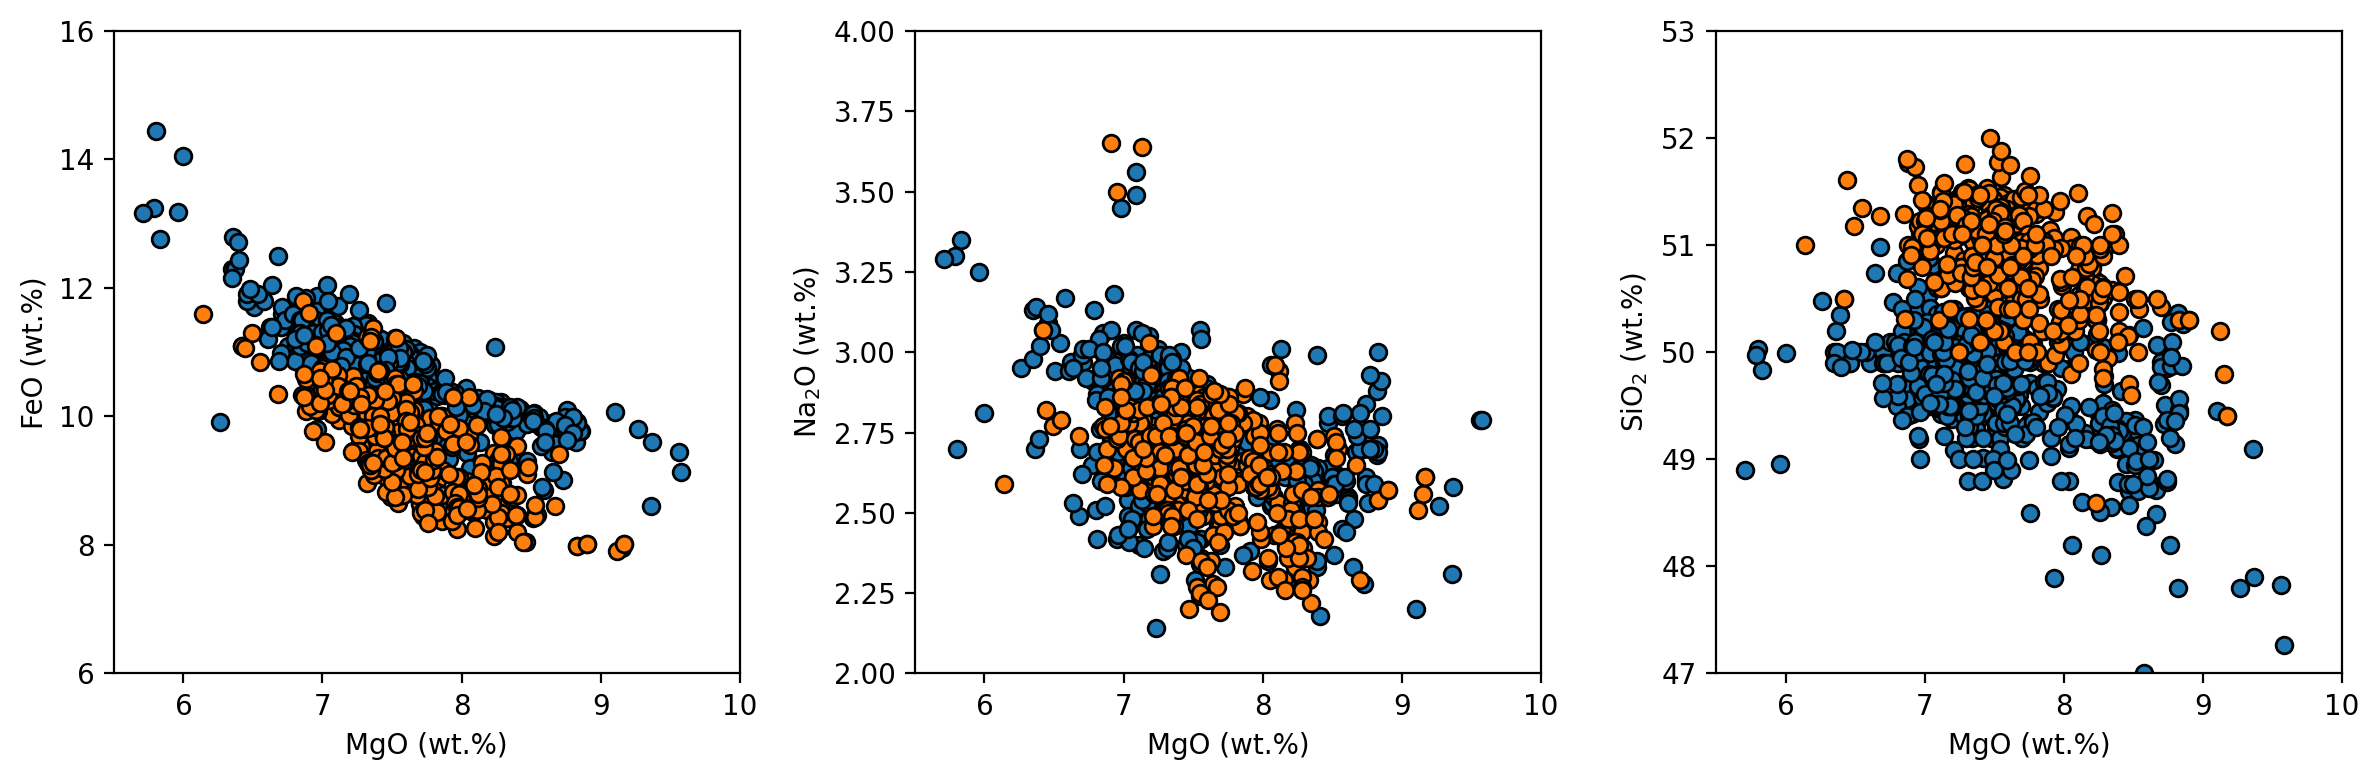

In [20]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
ax = ax.flatten()
ax[0].scatter(jdf.MGO, jdf.FEOT, lw=1, ec='black')
ax[0].scatter(gorda.MGO, gorda.FEOT, lw=1, ec='black')
ax[0].set_xlabel('MgO (wt.%)')
ax[0].set_ylabel('FeO (wt.%)')
ax[0].set_xlim([5.5, 10])
ax[0].set_ylim([6, 16])

ax[1].scatter(jdf.MGO, jdf.NA2O, lw=1, ec='black')
ax[1].scatter(gorda.MGO, gorda.NA2O, lw=1, ec='black')
ax[1].set_xlabel('MgO (wt.%)')
ax[1].set_ylabel('Na$_2$O (wt.%)')
ax[1].set_xlim([5.5, 10])
ax[1].set_ylim([2, 4])

ax[2].scatter(jdf.MGO, jdf.SIO2, lw=1, ec='black')
ax[2].scatter(gorda.MGO, gorda.SIO2, lw=1, ec='black')
ax[2].set_xlabel('MgO (wt.%)')
ax[2].set_ylabel('SiO$_2$ (wt.%)')
ax[2].set_xlim([5.5, 10])
ax[2].set_ylim([47, 53])

plt.tight_layout()

### C. How are the geochemical variations similar? 


### D. How are the two suites different? 
